# Project V: Chat Sentiment Analysis Service with API

## Creating connection with pymongo

In [1]:
from pymongo import MongoClient
import requests

In [2]:
client = MongoClient()

In [3]:
client

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [4]:
db = client.get_database("chat-api")

In [5]:
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'chat-api')

---

In [6]:
url = "http://localhost:5000"

In [7]:
res = requests.get(url)

In [8]:
res

<Response [200]>

In [9]:
res.json()

{'welcome': 'Hi! Welcome to my API'}

## Creating conversation

**Sean (Robin Williams)**: "Do you have a soul-mate?"

**Will (Matt Damon)**: "Define that."

**Sean**: "Someone who challenges you in every way. Who takes you places, opens things up for you. A soul-mate."

**Will**: "Yeah. Shakespeare, Nietzsche, Frost, O'Connor, Chaucer, Pope, Kant…"

[...]

**Sean**: "That's what I'm saying, Will. You'll never have that kind of relationship in a world where you're afraid to take the first step because all you're seeing are the negative things that might happen ten miles down the road."

In [15]:
# SEAN
url = f"http://localhost:5000/chat/5fc52bb0c0f85e0f9835ccbf/addmessage"

chat = {"chat_id":"5fc52bb0c0f85e0f9835ccbf", "user_id":"5fc50d063780539cf40dee1a", "text":"Do you have a soul-mate?"}

res = requests.get(url, params=chat)
print(res)

res.json
print(res.content)

<Response [200]>
b'{"_id": {"$oid": "5fc5781a0d87278d843c71a6"}, "chatname": 1, "username": 1}'


In [17]:
# WILL
url = f"http://localhost:5000/chat/5fc52bb0c0f85e0f9835ccbf/addmessage"

chat = {"chat_id":"5fc52bb0c0f85e0f9835ccbf", "user_id":"5fc50b403780539cf40dee19", "text":"Define that."}

res = requests.get(url, params=chat)
print(res)

res.json
print(res.content)

<Response [200]>
b'{"_id": {"$oid": "5fc578ce0d87278d843c71a8"}, "chatname": 1, "username": 1}'


In [18]:
# SEAN
url = f"http://localhost:5000/chat/5fc52bb0c0f85e0f9835ccbf/addmessage"

chat = {"chat_id":"5fc52bb0c0f85e0f9835ccbf", "user_id":"5fc50d063780539cf40dee1a", "text":"Someone who challenges you in every way. Who takes you places, opens things up for you. A soul-mate."}

res = requests.get(url, params=chat)
print(res)

res.json
print(res.content)

<Response [200]>
b'{"_id": {"$oid": "5fc578f90d87278d843c71a9"}, "chatname": 1, "username": 1}'


In [19]:
# WILL
url = f"http://localhost:5000/chat/5fc52bb0c0f85e0f9835ccbf/addmessage"

chat = {"chat_id":"5fc52bb0c0f85e0f9835ccbf", "user_id":"5fc50b403780539cf40dee19", "text":"Yeah. Shakespeare, Nietzsche, Frost, O'Connor, Chaucer, Pope, Kant…"}

res = requests.get(url, params=chat)
print(res)

res.json
print(res.content)

<Response [200]>
b'{"_id": {"$oid": "5fc5797c0d87278d843c71aa"}, "chatname": 1, "username": 1}'


In [20]:
# SEAN
url = f"http://localhost:5000/chat/5fc52bb0c0f85e0f9835ccbf/addmessage"

chat = {"chat_id":"5fc52bb0c0f85e0f9835ccbf", "user_id":"5fc50d063780539cf40dee1a", "text":"That's what I'm saying, Will. You'll never have that kind of relationship in a world where you're afraid to take the first step because all you're seeing are the negative things that might happen ten miles down the road."}

res = requests.get(url, params=chat)
print(res)

res.json
print(res.content)

<Response [200]>
b'{"_id": {"$oid": "5fc579970d87278d843c71ab"}, "chatname": 1, "username": 1}'


## Sentiment Analysis

In [28]:
!pip3 install nltk

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.


In [6]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords

In [7]:
# Solving download "vader_lexicon" issue FALSE

import ssl 

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

In [8]:
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/Angela/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [9]:
sia = SentimentIntensityAnalyzer()

In [12]:
res = list(db.messages.find({"_id":"5fc579970d87278d843c71ab"}))
res

[]

In [13]:
sia.polarity_scores("Do you have a soul-mate?")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [14]:
sia.polarity_scores("Someone who challenges you in every way. Who takes you places, opens things up for you. A soul-mate.")

{'neg': 0.0, 'neu': 0.925, 'pos': 0.075, 'compound': 0.0772}

In [15]:
sia.polarity_scores("That's what I'm saying, Will. You'll never have that kind of relationship in a world where you're afraid to take the first step because all you're seeing are the negative things that might happen ten miles down the road")

{'neg': 0.091, 'neu': 0.909, 'pos': 0.0, 'compound': -0.5719}

### Observation:
- We can see how the sentiment evolves from **neutral**, to **positive** and ends up in **negative**.
- This indeed matches the scene of the movie, when Sean and Will are having a deep conversation about soul-mates. Will doesn't believe in such a thing and thinks that he can go through life without ever having to really know anybody, in a more intimate way. Sean disagrees, clearly, and that's when this dialogue takes place.
- Sean is conveying a **negative sentiment** since he is frustrated with how Will reacts on the topic.

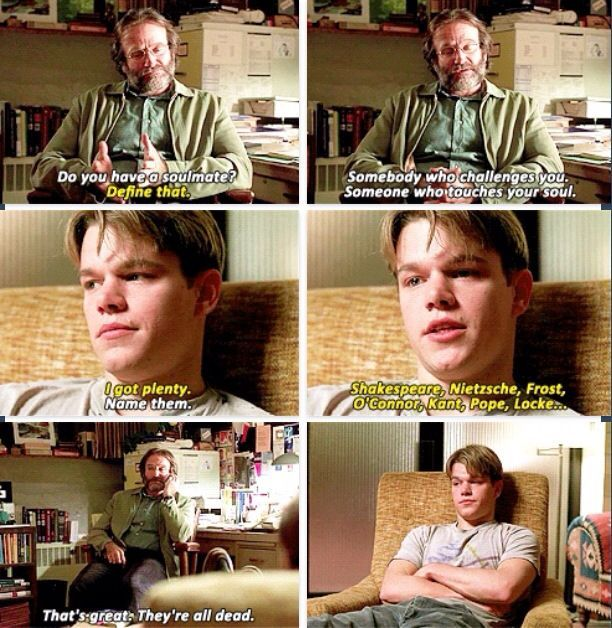